# Time Series Analysis

In [21]:
import collections
import os
import re
import json

import numpy as np
import pandas as pd
import nltk
import sklearn.cross_validation as skcv
import sklearn.decomposition as skd
import sklearn.ensemble as skens
import sklearn.feature_extraction.text as skft
import sklearn.naive_bayes as sknb
import sklearn.pipeline as skpipe
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import sklearn.preprocessing as skp
from ast import literal_eval
from nltk.util import ngrams
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.graphics as smg
from pandas.tools.plotting import radviz
from pandas.tools.plotting import bootstrap_plot
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.3)
sns.set(style='white', color_codes=True, font_scale=1.3)

### Import Data (parsing time)

In [10]:
df = pd.DataFrame.from_csv('combinedtrip.csv', index_col=11, parse_dates=True, infer_datetime_format=True)

In [15]:
df = df.rename(columns=lambda x: x.strip())

#remove extra space that's on the left of all but one column

In [4]:
df.shape

(1048575, 19)

### Dates range from 1/1/13 to 1/9/13

In [5]:
df.sort('dropoff_datetime', ascending=True)

,medallion,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
pickup_datetime,,,,,,,,,,,,,,,,,,,
2013-01-01 00:02:00,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,VTS,CSH,27.0,0.0,0.5,0.00,0.0,27.50,5,1/1/2013 0:02,1,0,0.00,0.000000,0.000000,0.000000,0.000000
2013-01-01 00:00:00,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,VTS,CSH,3.5,0.5,0.5,0.00,0.0,4.50,1,1/1/2013 0:02,1,120,0.44,-73.956528,40.716976,-73.962440,40.715008
2013-01-01 00:02:00,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,VTS,CRD,3.0,0.5,0.5,0.70,0.0,4.70,1,1/1/2013 0:03,1,60,0.39,-73.981544,40.781475,-73.979439,40.784386
2013-01-01 00:01:00,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,VTS,CRD,4.0,0.5,0.5,0.00,0.0,5.00,1,1/1/2013 0:03,3,120,0.61,-73.987373,40.724861,-73.983772,40.730995
2013-01-01 00:01:00,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,VTS,CSH,4.0,0.5,0.5,0.00,0.0,5.00,1,1/1/2013 0:03,4,120,0.48,-74.004173,40.720947,-74.003838,40.726189
2013-01-01 00:02:00,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,VTS,CRD,2.5,0.5,0.5,0.25,0.0,3.75,1,1/1/2013 0:03,3,60,0.00,0.000000,0.000000,0.000000,0.000000
2013-01-01 00:01:00,DD467ED2E7DDB5C8B9B918469604E54F,1D7876BD692018A5BE422C420A5148EA,VTS,CSH,5.0,0.5,0.5,0.00,0.0,6.00,1,1/1/2013 0:04,1,180,0.95,-73.976753,40.750706,-73.990089,40.750729
2013-01-01 00:01:00,6BA29E9A69B10F218C1509BEDD7410C2,ED368552102F12EA252C63782F12CD4C,VTS,CRD,4.5,0.5,0.5,0.00,0.0,5.50,1,1/1/2013 0:04,1,180,0.74,-73.971138,40.758980,-73.972206,40.752502
2013-01-01 00:03:00,F8A0B52B22BB58B3C45E66CEE135C29D,00B7691D86D96AEBD21DD9E138F90840,VTS,CRD,2.5,0.5,0.5,0.25,0.0,3.75,1,1/1/2013 0:04,3,60,0.00,-73.937637,40.758369,-73.937607,40.758350


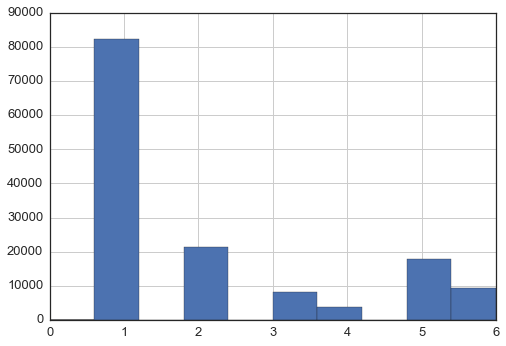

In [16]:
df.passenger_count.ix['2013-1-1':'2013-1-9'].hist()

#passenger distriution for the 8 days

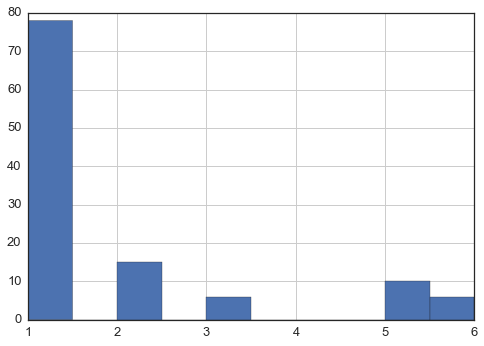

In [17]:
df.passenger_count.ix['2013-1-4'].hist()

#Passenger distribution for 1/4/13. This was the day with the highest summed passenger count

### Examining passenger count/mean per day

In [14]:
df.passenger_count.ix['2013-1-4'].count()

115

In [9]:
df.passenger_count.ix['2013-1-5'].mean()

1.891304347826087

In [16]:
df.passenger_count.ix['2013-1-5'].count()

92

In [10]:
df.passenger_count.ix['2013-1-6'].mean()

1.64

In [17]:
df.passenger_count.ix['2013-1-6'].count()

75

In [11]:
df.passenger_count.ix['2013-1-7'].mean()

1.2727272727272727

In [18]:
df.passenger_count.ix['2013-1-7'].count()

55

### Time series plot of fare and tip amount from New Years (1/1/13) to 1/9/13

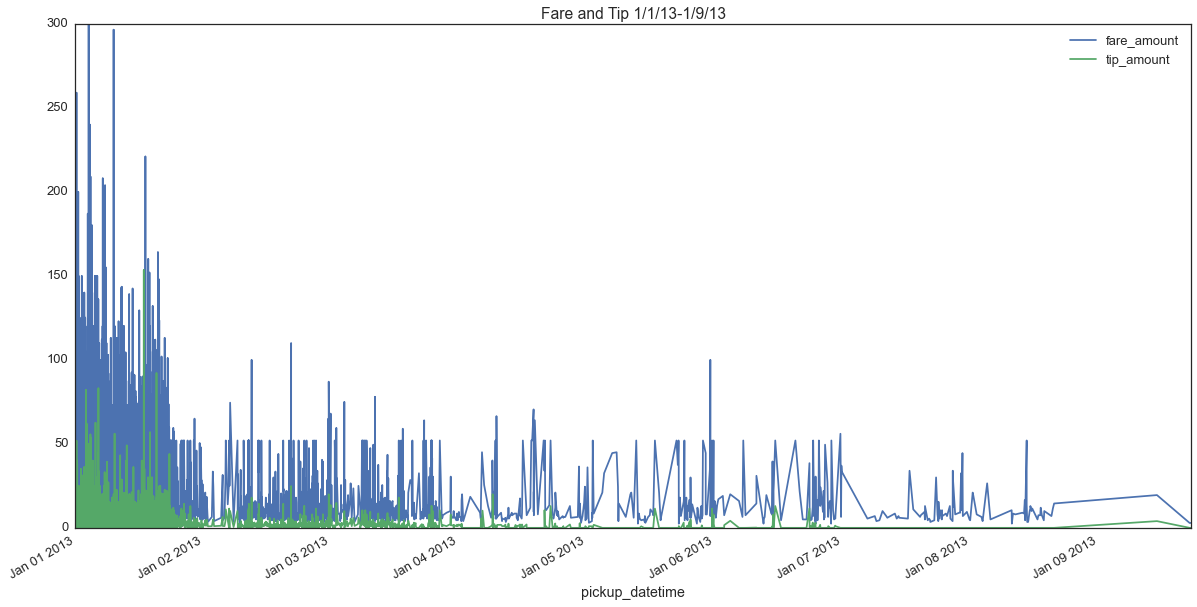

In [20]:
# Massive volume of rides and tips peak on New Years. Tapers off as the week progresses.
fig, ax = plt.subplots(figsize=(20,10))
yo = df.ix['2013-1-1':'2013-1-9', ['fare_amount','tip_amount']].plot(ax=ax,title='Fare and Tip 1/1/13-1/9/13')

yo

fig = yo.get_figure()
fig.savefig("total-sales.png")

### I was going to normalize and produce autocorrelations or rolling means, but then realized it wouldn't work with only one week worth of data. Given the number of taxi rides, my computer doesn't have enough working memory to process more than a week

In [6]:
dfnorm = df.copy()
dfnorm.ix[:,4:8] = skp.scale(df.ix[:,4:8])
dfnorm.head()

,medallion,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
pickup_datetime,,,,,,,,,,,,,,,,,,,
2013-01-01 15:11:00,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,CSH,-0.541407,-0.832830,0.056977,-0.609327,0,7.0,1,1/1/2013 15:18,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
2013-01-06 00:18:00,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,CSH,-0.590119,0.514917,0.056977,-0.609327,0,7.0,1,1/6/2013 0:22,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2013-01-05 18:49:00,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,CSH,-0.638831,1.862663,0.056977,-0.609327,0,7.0,1,1/5/2013 18:54,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
2013-01-07 23:54:00,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,CSH,-0.687543,0.514917,0.056977,-0.609327,0,6.0,1,1/7/2013 23:58,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
2013-01-07 23:25:00,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,CSH,-0.249134,0.514917,0.056977,-0.609327,0,10.5,1,1/7/2013 23:34,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [28]:
dfroll = df.copy()
dfroll.index = dfroll.index.unique()

ValueError: Length mismatch: Expected axis has 1048575 elements, new values have 10291 elements

In [27]:
# Plot the prices with rollling means
ts_reg2 = dfroll.fare_amount
windows = [20,50,100]
cols = [pd.rolling_mean(ts_reg2, w) for w in windows]
df_reg_ma = pd.DataFrame(cols + [ts_reg2]).T
# df_reg_ma.columns = ['%d day reg'%w for w in windows] + ['Fare Amount']

fig, ax = plt.subplots(figsize=(12,4))
df_reg_ma['2013-1-1':'2013-1-9'].plot(ax=ax)
plt.title('Fare')

ValueError: Array conditional must be same shape as self